In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [49]:
df_netflix_final = pd.read_csv("C:/Users/Usuario/Documents/Adalab49/Módulo 4/Modulo-4_Proyecto-Tableau_Maria_Maleni/files/analisis_netflix_final.csv")


In [50]:
df_netflix_final.sample(10)

,type,title,director,country,release_year,age_rating,genre,rating,stars,votes,month_added,year_added,duration_min,seasons
1667,Movie,1922,Zak Hilditch,United States,2017,TV-MA,Dramas,6.2,Zak Hilditch,63582,10,2017,103,0
1265,Movie,a tale of two kitchens,Trisha Ziff,United States,2019,TV-PG,Documentaries,6.3,Trisha Ziff,284,5,2019,30,0
1104,Movie,american son,Kenny Leon,United States,2019,TV-MA,Dramas,5.8,Kenny Leon,7112,11,2019,90,0
4485,TV Show,russian doll,Not Given,United States,2019,TV-MA,TV Comedies,7.1,Alexander Buono,1001,2,2019,0,1
3818,TV Show,toy boy,Not Given,Spain,2019,TV-MA,Crime TV Shows,6.6,Iñaki Mercero,228,2,2020,0,1
3059,TV Show,power rangers beast morphers,Not Given,United States,2020,TV-Y7,Kids' TV,8.9,Riccardo Pellizzeri,36,10,2020,0,2
1568,Movie,i am not an easy man,Eleonore Pourriat,France,2018,TV-MA,Comedies,6.3,Eléonore Pourriat,14604,4,2018,99,0
1819,Movie,david brent: life on the road,Ricky Gervais,United Kingdom,2016,TV-MA,Comedies,6.3,Ricky Gervais,20604,2,2017,97,0
490,Movie,dogwashers,Carlos Moreno,Colombia,2021,TV-MA,Comedies,5.8,Carlos Moreno,612,3,2021,108,0
2209,Movie,the hurricane heist,Rob Cohen,United Kingdom,2018,PG-13,Action & Adventure,5.1,Rob Cohen,20847,9,2018,103,0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_40012\2818429717.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df_netflix_final, palette='viridis')


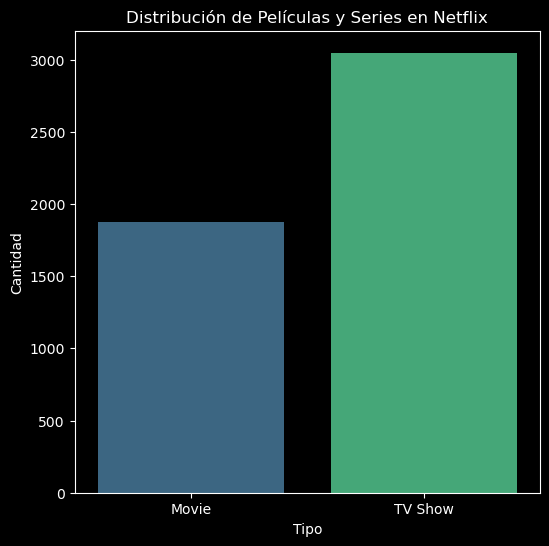

In [51]:
# Gráfico
plt.figure(figsize=(6,6))
sns.countplot(x='type', data=df_netflix_final, palette='viridis')
plt.title('Distribución de Películas y Series en Netflix')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.show()

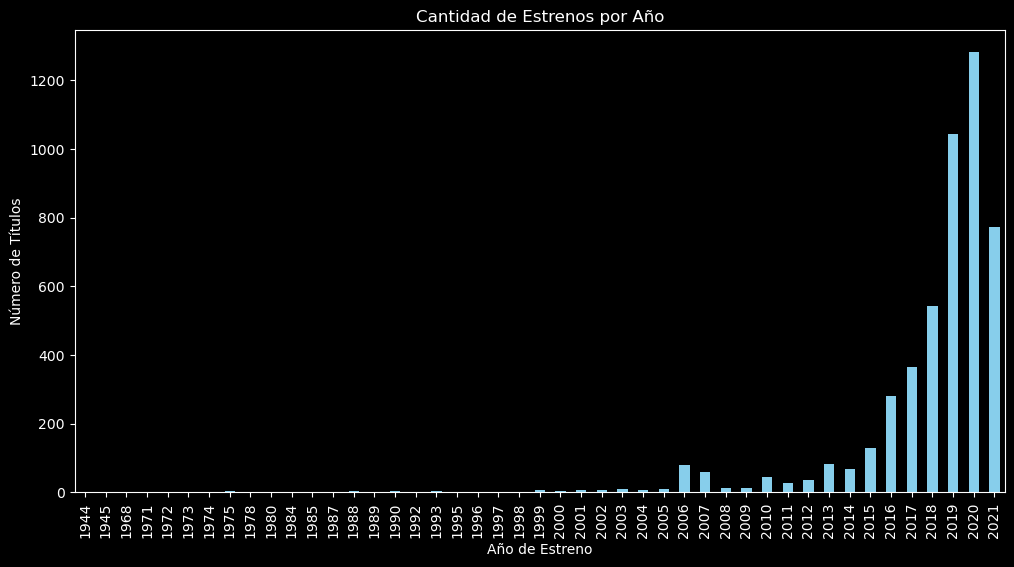

In [52]:
plt.figure(figsize=(12,6))
df_netflix_final['release_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Cantidad de Estrenos por Año')
plt.xlabel('Año de Estreno')
plt.ylabel('Número de Títulos')
plt.show()

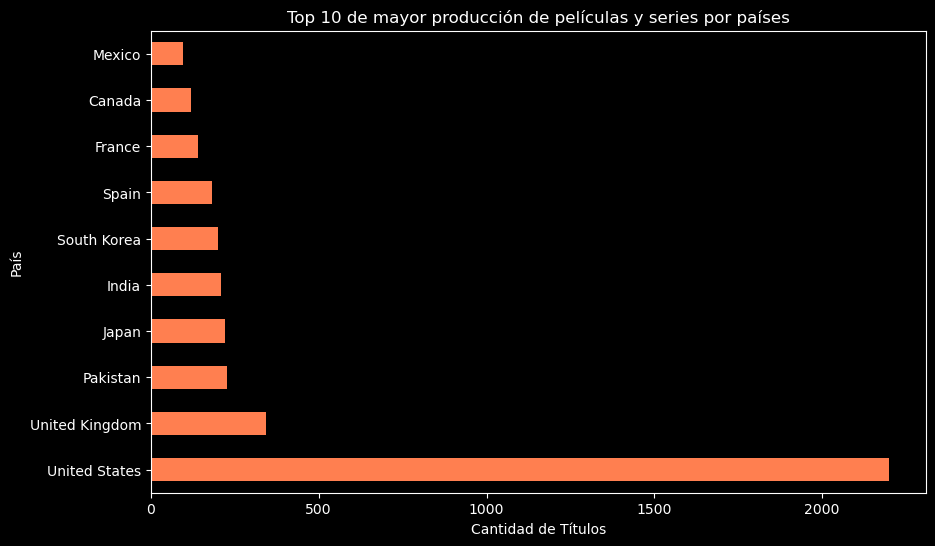

In [53]:
plt.figure(figsize=(10,6))
df_netflix_final['country'].value_counts().head(10).plot(kind='barh', color='coral')
plt.title("Top 10 de mayor producción de películas y series por países")
plt.xlabel('Cantidad de Títulos')
plt.ylabel('País')
plt.show()

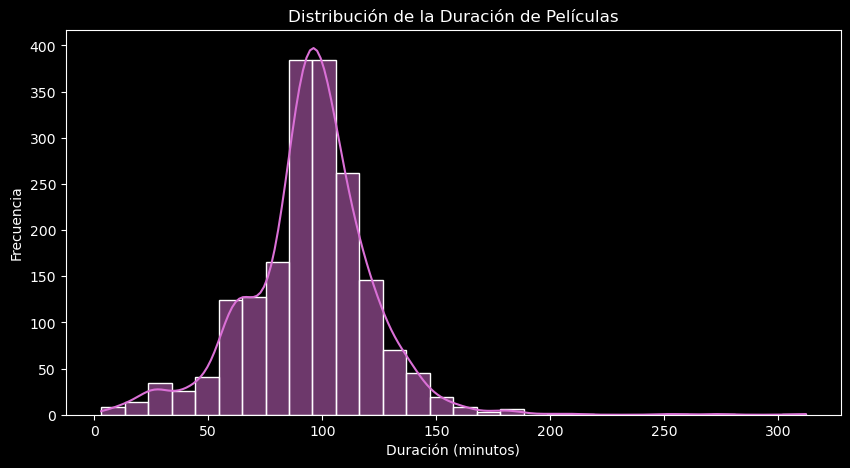

In [54]:
plt.figure(figsize=(10,5))
sns.histplot(df_netflix_final[df_netflix_final['duration_min'] > 0]['duration_min'], bins=30, kde=True, color='orchid')
plt.title('Distribución de la Duración de Películas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()

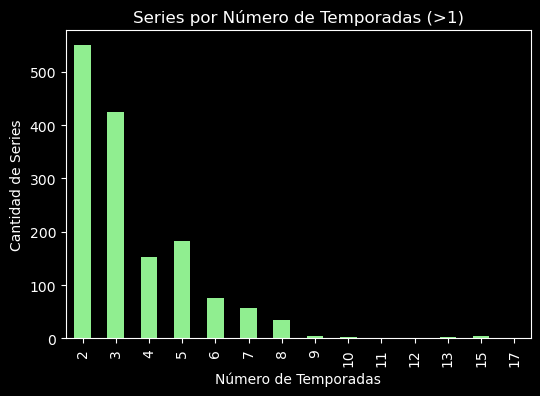

In [55]:
plt.figure(figsize=(6,4))
df_netflix_final[df_netflix_final['seasons'] > 1]['seasons'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Series por Número de Temporadas (>1)')
plt.xlabel('Número de Temporadas')
plt.ylabel('Cantidad de Series')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_40012\1780478272.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df_netflix_final, order=df_netflix_final['rating'].value_counts().index, palette='coolwarm')


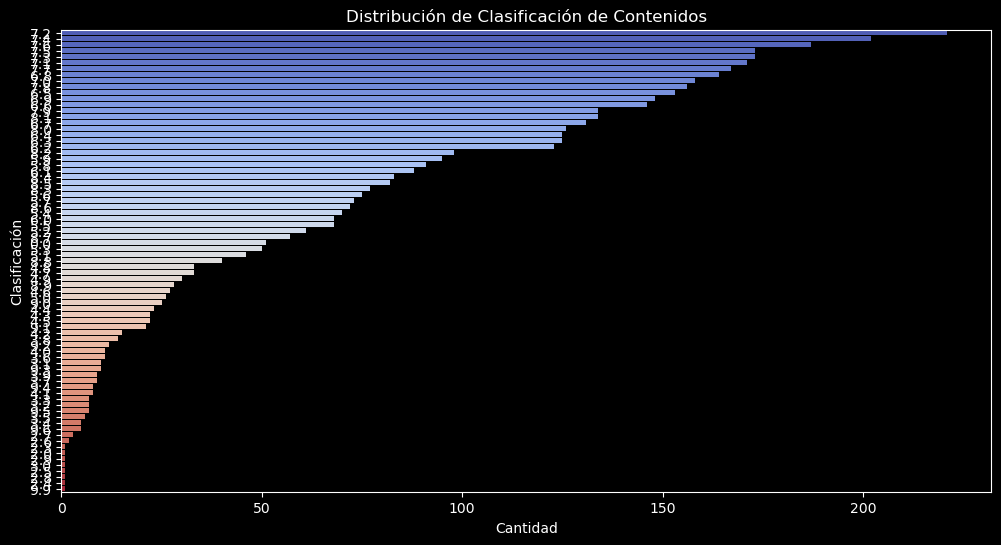

In [56]:
plt.figure(figsize=(12,6))
sns.countplot(y='rating', data=df_netflix_final, order=df_netflix_final['rating'].value_counts().index, palette='coolwarm')
plt.title('Distribución de Clasificación de Contenidos')
plt.xlabel('Cantidad')
plt.ylabel('Clasificación')
plt.show()

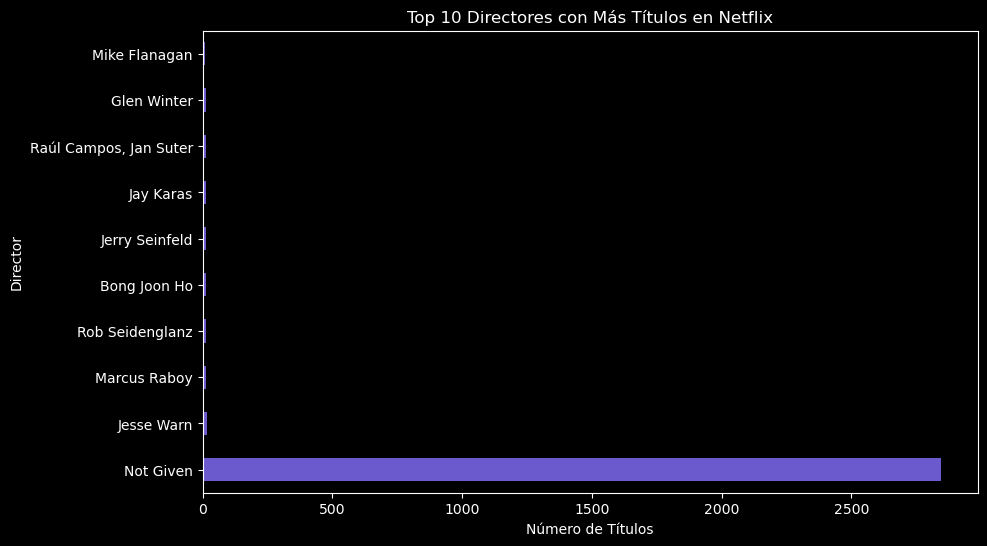

In [57]:
plt.figure(figsize=(10,6))
df_netflix_final['director'].value_counts().head(10).plot(kind='barh', color='slateblue')
plt.title('Top 10 Directores con Más Títulos en Netflix')
plt.xlabel('Número de Títulos')
plt.ylabel('Director')
plt.show()

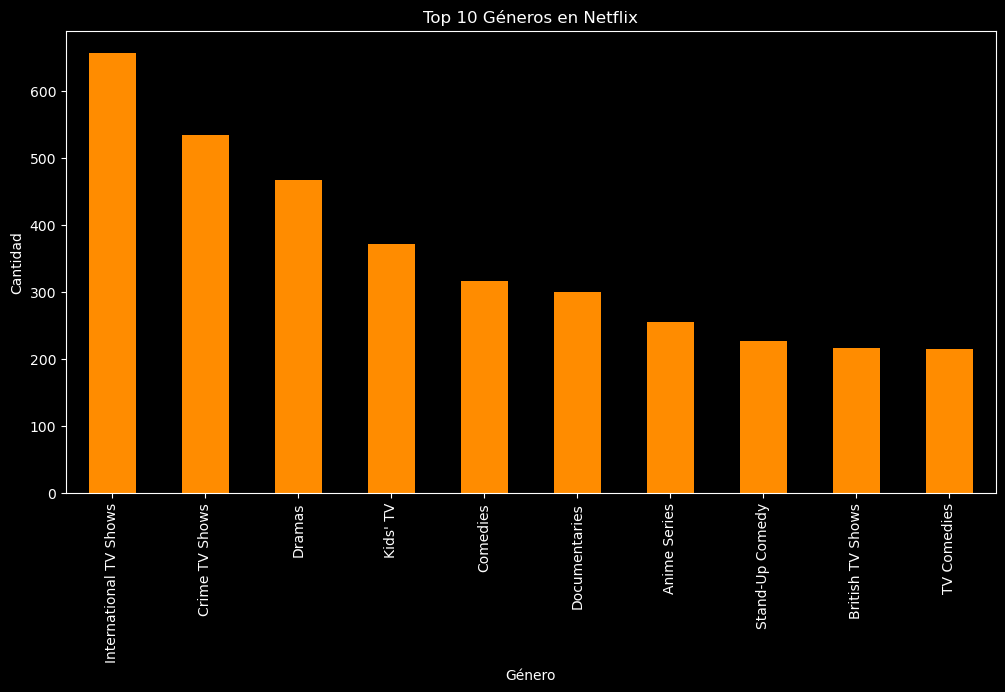

In [58]:
plt.figure(figsize=(12,6))
df_netflix_final['genre'].str.split(',').explode().str.strip().value_counts().head(10).plot(kind='bar', color='darkorange')
plt.title('Top 10 Géneros en Netflix')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

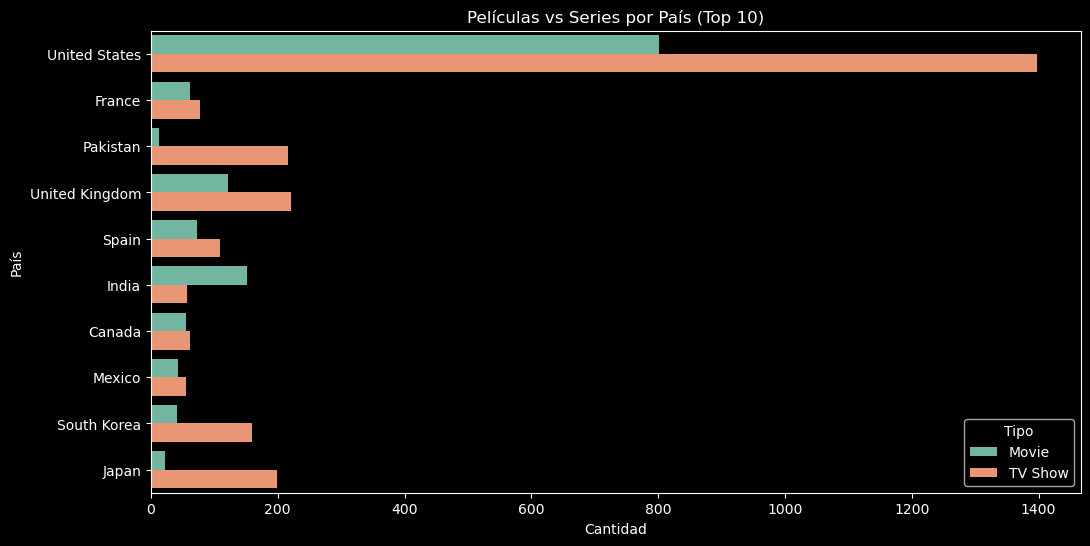

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(y='country', hue='type', data=df_netflix_final[df_netflix_final['country'].notnull() & df_netflix_final['country'].isin(df_netflix_final['country'].value_counts().head(10).index)], palette='Set2')
plt.title('Películas vs Series por País (Top 10)')
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.legend(title='Tipo')
plt.show()

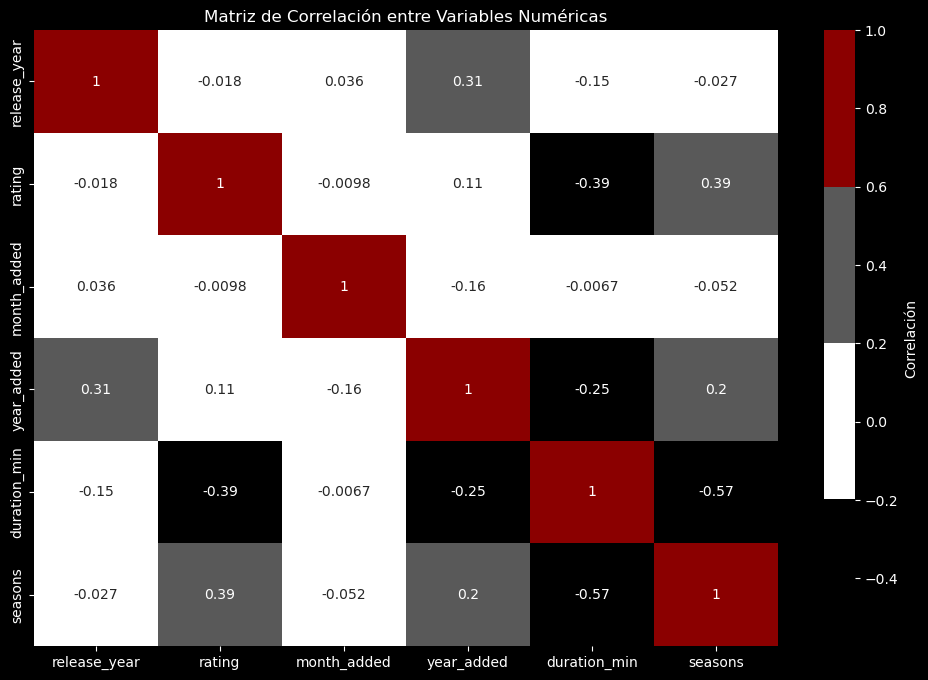

In [62]:
# Seleccionar variables numéricas relevantes
numeric_cols = ['release_year', 'rating', 'month_added',
                'year_added', 'duration_min', 'seasons']

# Paleta personalizada Netflix
netflix_palette = ['#E50914', '#000000', '#FFFFFF', '#595959', '#8B0000']

# Fondo negro
plt.style.use('dark_background')

plt.figure(figsize=(12, 8))
# Usando cmap de dos tonos básicos para que no choque, puedes personalizar más con 'coolwarm' o mapas discretos
sns.heatmap(df_netflix_final[numeric_cols].corr(),
            annot=True,
            cmap=sns.color_palette(netflix_palette, as_cmap=True),
            center=0,
            cbar_kws={'label': 'Correlación'})

plt.title('Matriz de Correlación entre Variables Numéricas', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()